In [1]:
# Importación de un modelo con datos de ventas de casas
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('ANalista de Datos M43 - Housing.csv')

## Exploratory Data Analysis (EDA)

In [2]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
247,4550000,8400,4,1,4,yes,no,no,no,no,3,no,unfurnished
117,5950000,3700,4,1,2,yes,yes,no,no,yes,0,no,furnished
293,4200000,4410,2,1,1,no,no,no,no,no,1,no,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
41,7840000,6360,3,2,4,yes,no,no,no,yes,0,yes,furnished
43,7700000,6000,4,2,4,yes,no,no,no,no,2,no,semi-furnished
495,2730000,4000,3,1,2,yes,no,no,no,no,1,no,unfurnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
470,3010000,5076,3,1,1,no,no,no,no,no,0,no,unfurnished
343,3850000,4080,2,1,1,yes,no,no,no,no,0,no,semi-furnished


In [3]:
# Validar cuántas celdas en total son nulas
print('Existen ',df.isnull().sum().sum(), ' valores no existentes')

Existen  0  valores no existentes


In [4]:
# Cambio el formato gráfico
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [5]:
# Obtener los principales estadisticos por cada uno
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4766729.2,1870439.6,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5150.5,2170.1,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,3.0,0.7,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.3,0.5,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.8,0.9,1.0,1.0,2.0,2.0,4.0
parking,545.0,0.7,0.9,0.0,0.0,0.0,1.0,3.0


In [6]:
# Se ve el total de valores unicos por cada columna
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

## Feature Engineering

In [7]:
# Transformamos los valores yes/no a 1/0 y los furnish 1, 2, 3
df['mainroad'] = df['mainroad'].replace({'yes':1, 'no':0}, regex=True)
df['guestroom'] = df['guestroom'].replace({'yes':1, 'no':0}, regex=True)
df['basement'] = df['basement'].replace({'yes':1, 'no':0}, regex=True)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes':1, 'no':0}, regex=True)
df['airconditioning'] = df['airconditioning'].replace({'yes':1, 'no':0}, regex=True)
df['prefarea'] = df['prefarea'].replace({'yes':1, 'no':0}, regex=True)
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished':3, 'semi-furnished':2, 'furnished':1}, regex=True)

In [8]:
# Se comprueba los nuevos valores cambiados
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,3
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,3


In [9]:
# Se valida la estructura interna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


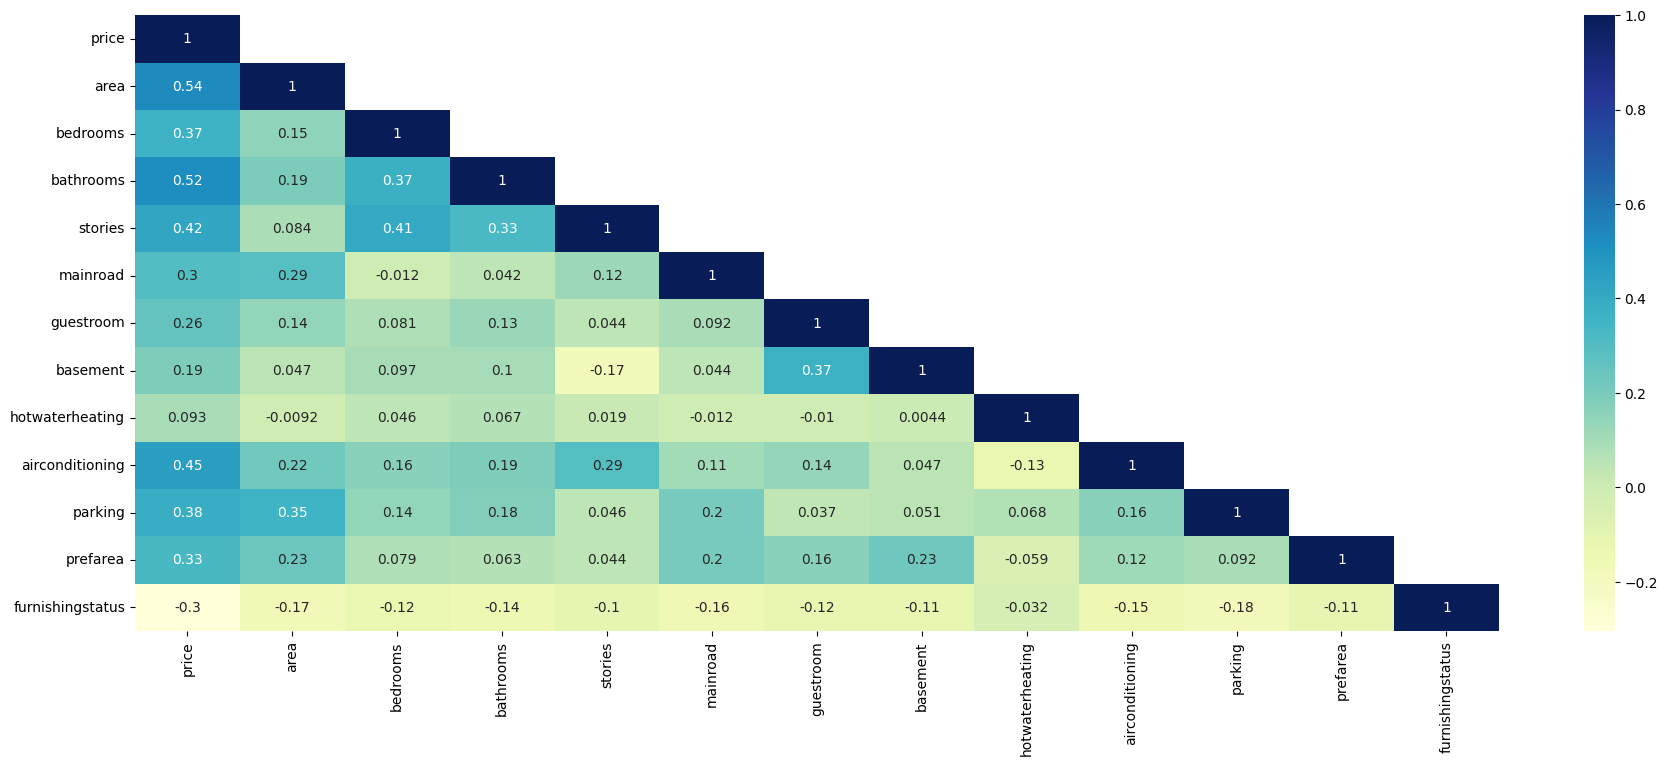

In [10]:
# Gráfica de correlación
plt.figure(figsize=(22,8))
corr_df = corr = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)


In [11]:
# Visualiza las columnas y luego selecciona las columnas númericas
print('Lista Completa de Columnas')
print('--------------------------------------')
print(df.columns)
print(len(df.columns), ' columnas')

# Numerical columns
cols_num = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea', 'furnishingstatus']

Lista Completa de Columnas
--------------------------------------
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
13  columnas


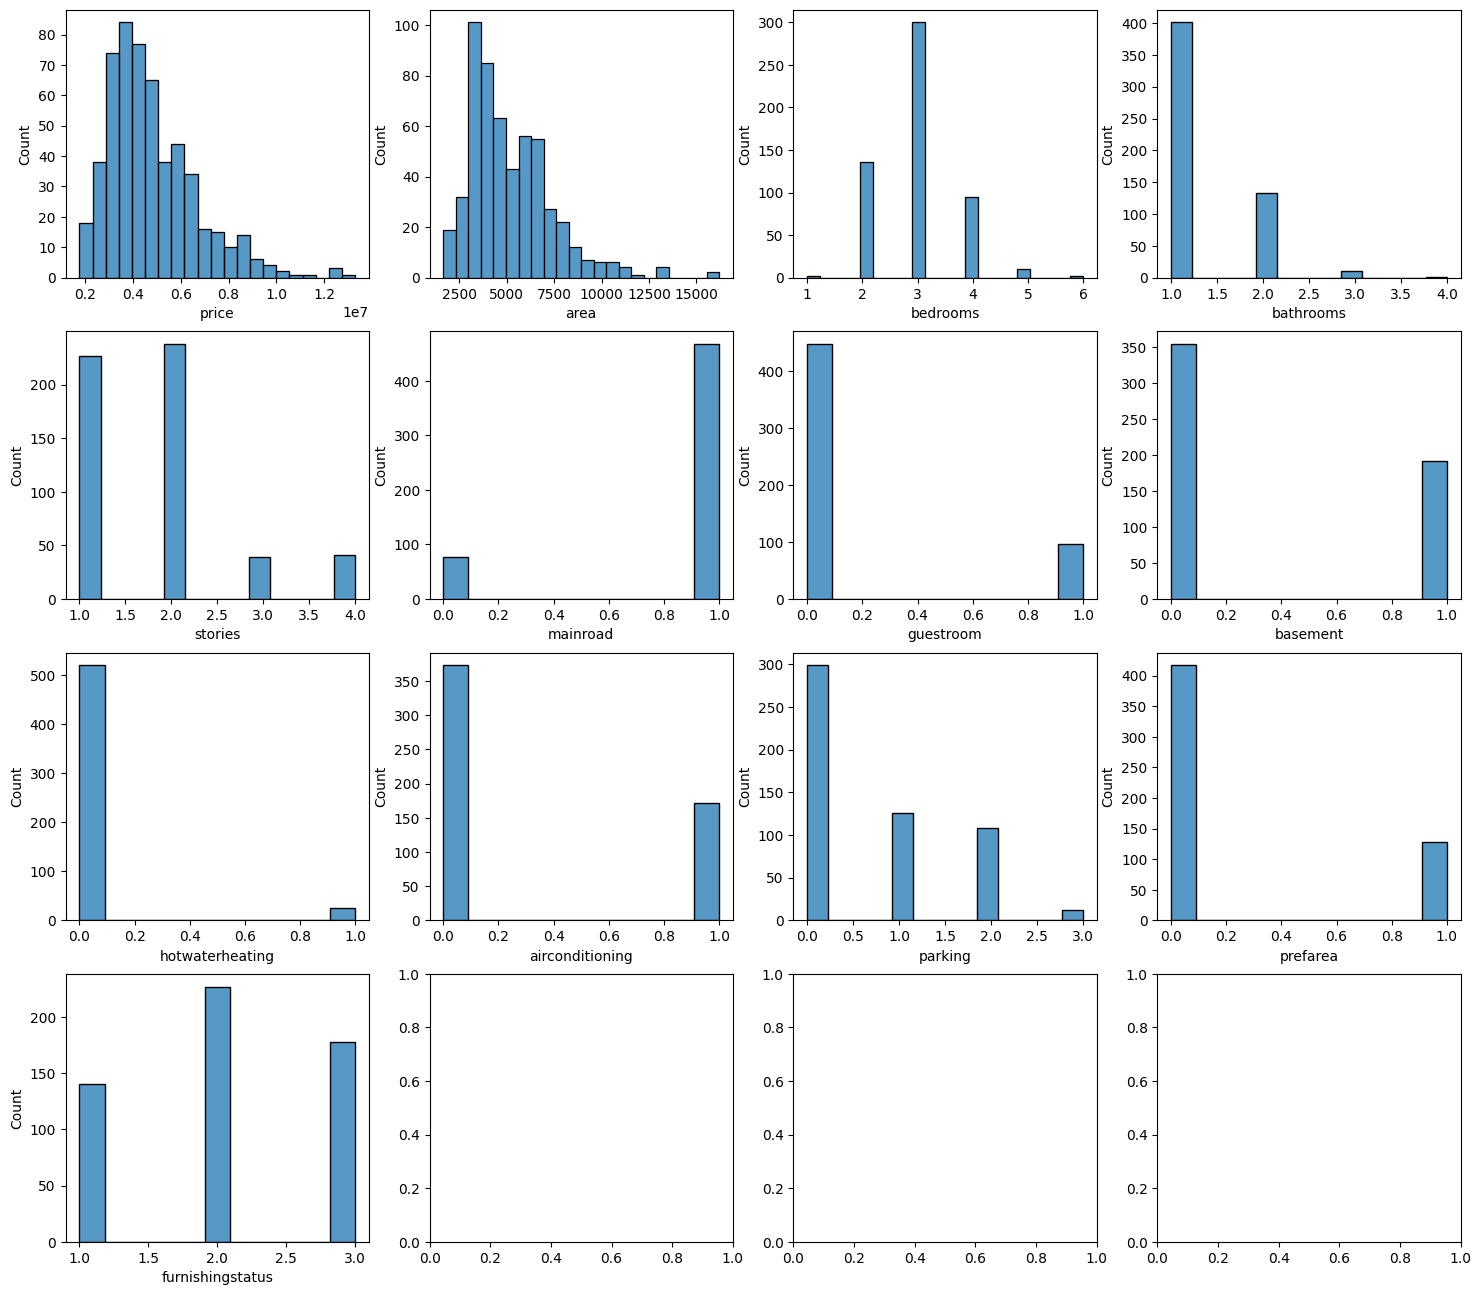

In [12]:
# Gráfica exploratoria de todas las columnas (25)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=axes[i//4, i%4], kde=False)

In [13]:
# Dividir dataset entre training y test (70:30)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Librería para hacer un split entre train y test
from sklearn.metrics import mean_squared_error

# Construcción de los dataframes X e y para la regresión
# Variables independientes
X = df.drop(['price'], axis=1)
# Variable dependiente
y=df[['price']]

# Generación de variables dummy en el set de datos
X = pd.get_dummies(X, drop_first=True)

In [14]:
# Divide a los dataframes en 70 y 30
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=1)

In [15]:
# Ejecuta la regresión lineal

# construye el regresor
regression_model = LinearRegression()

# Genera el fit de la regresión con la función fit
regression_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Coeficiente de regresión de test
# Es el R2, o cuánto explica el modelo de la data de test
regression_model.score(X_test, y_test)

0.6621173401969209

In [17]:
# Comparación de Predicción vs Actual
y_pred = regression_model.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
62,7070000,6291567.1
247,4550000,6390833.3
142,5600000,6529768.6
107,6125000,5564502.0
483,2940000,4230599.3
...,...,...
450,3150000,4008865.1
542,1750000,2717347.4
408,3430000,2810959.6
80,6629000,5677214.5


In [18]:
# Obtiene los coeficientes de la ecuación para la importancia de las variables
for idx, col_name in enumerate(X_train.columns):
    print('Coef {} = {}'.format(col_name, regression_model.coef_[0][idx]))

Coef area = 246.34768711251905
Coef bedrooms = 47198.86272511119
Coef bathrooms = 1020173.2432420906
Coef stories = 525778.963351805
Coef mainroad = 476712.98481254233
Coef guestroom = 275668.95076000557
Coef basement = 557956.2675518374
Coef hotwaterheating = 822714.5575357169
Coef airconditioning = 608777.0120530976
Coef parking = 274736.4499754947
Coef prefarea = 500668.03295517946
Coef furnishingstatus = -202462.66994588473


In [19]:
# Sacamos la importancia de las variables pero ahora con el intercept también
coeff_list = []

# Intercept
coeff_list.append({'Coeff': regression_model.intercept_[0], 'Var': 'Intercept'})

# Coeficientes
for idx, col_name in enumerate(X_train.columns):
    coeff_list.append({'Var': col_name, 'Coeff':regression_model.coef_[0][idx]})

coeff_data = pd.DataFrame(coeff_list)

coeff_data

,Coeff,Var
0,315893.9,Intercept
1,246.3,area
2,47198.9,bedrooms
3,1020173.2,bathrooms
4,525779.0,stories
5,476713.0,mainroad
6,275669.0,guestroom
7,557956.3,basement
8,822714.6,hotwaterheating
9,608777.0,airconditioning


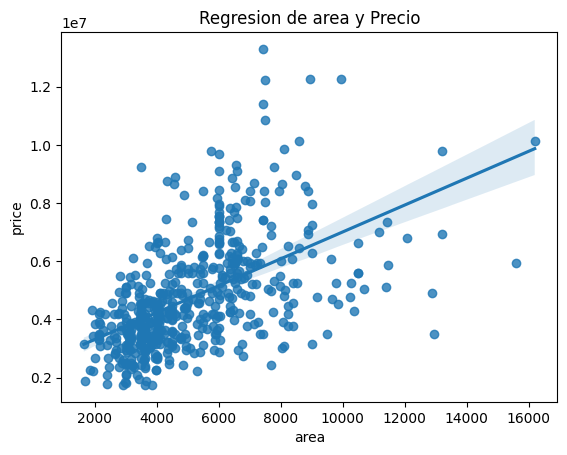

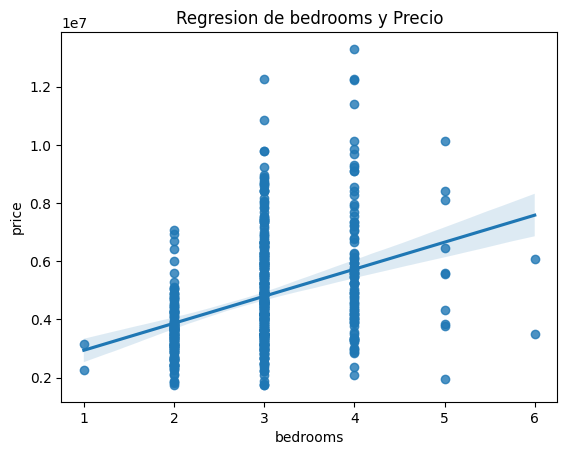

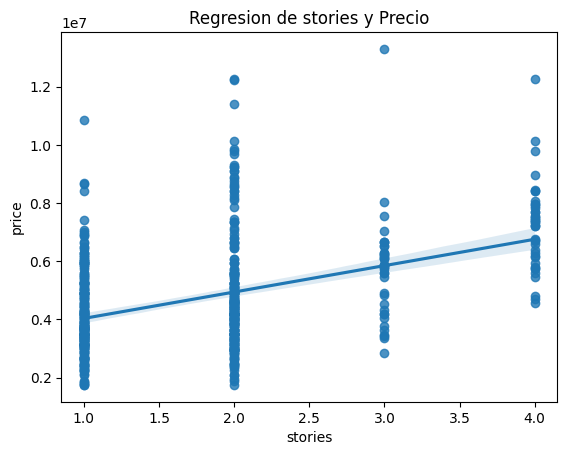

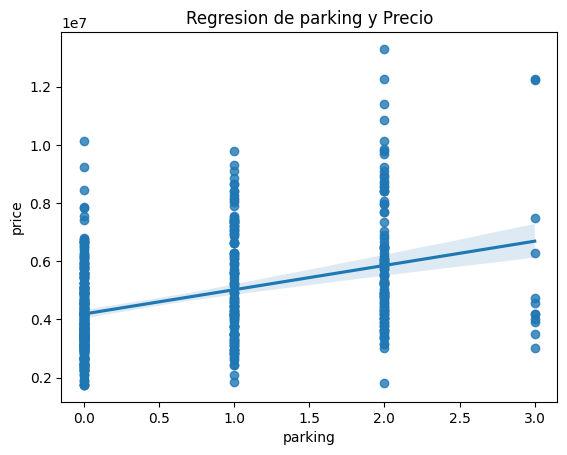

In [20]:
# Visualización de los resultados del modelo de regresión

variables = ['area', 'bedrooms', 'stories', 'parking']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='price', data=df).set(title=f'Regresion de {var} y Precio')

In [23]:
# Evaluar el rendimiento del modelo de regresión

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = regression_model.predict(X_test)

# Suma absoluta de las diferencias
mae = mean_absolute_error(y_test, y_pred)
# Suma absoluta de las diferencias al cuadrado
mse = mean_squared_error(y_test, y_pred)
# Raíz cuadrada de la suma absoluta de las diferencias al cuadrado

print(f'Mean absolute error:{mae:.2f}')
print(f'Mean squared error:{mse:.2f}')
print(f'Root mean squared error:{rmse:.2f}')

Mean absolute error:855894.77
Mean squared error:1375329793553.13
Root mean squared error:1172744.56
